In [137]:
import numpy as np, pandas as pd, os, matplotlib.pyplot as plt
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)
%matplotlib inline

In [138]:
df_raw = pd.read_csv(r"G:\My Drive\Creative_Meta_Analysis\Wave_2\SUMMARY_3.csv")

## Data Prep

In [139]:
df_raw.head()

,SID,Creative_Name,aware,cons,purch,enjoy,brand,rel,b_appeal,aware_base,cons_base,purch_base,gender,north_america,emea,apac,mobile,desktop,s06,s15,s30,age_30,age_45,p_low,p_high,pro_nexus,pro_android_os,pro_chromebook,pro_chromecast_aud,pro_chromecast,pro_google_play,pro_youtube_red,pro_youtube_music,pro_google_user,pro_google_photos,pro_g_suite,pro_pixel,pro_daydream,pro_android_pay,pro_google_home,pro_gsa,pro_google_assist,pro_youtube_tv,pro_android_wear,pro_fi,pro_youtube,pro_google_cloud,pro_google_express,pro_digital_skills,pro_feed,pro_google_home_mini,pro_duo,pro_ellen,pro_pixelbook,pro_google_duo,pro_pixel_2,pro_watercooler,pro_google_home_max,Real_World,Story_Driven,Event,Google_Logo_Upfront_Recode,Product_Logo_Upfront_Recode,Audio_Mention_Upfront_Recode,No_of_Visuals_Recode,Google_Logo_50,Product_Logo_50,Product_Shot_50,Text_on_End_Card,Demo,Front_Card,End_Card,Pop_Culture,Visually_Text_Only,Music,Voiceover,No_Product_Msgs_Recode
0,266344,Nexus5AvailableNow15sec=266344B (Test),0.478548,0.283828,0.369637,0.495050,0.693069,0.749175,0.577558,0.310000,0.18,0.36,0.287129,1,0,0,0,1,0,1,0,0.679868,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,animated,no,no,Zero,1+,Zero,Zero,no,yes,yes,yes,yes,yes,yes,no,No,yes,no,Zero
1,266344,Nexus5XAvailableNow30sec=266344A (Test),0.544262,0.295082,0.432787,0.619672,0.780328,0.868852,0.704918,0.310000,0.18,0.36,0.268852,1,0,0,0,1,0,0,1,0.678689,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,animated,no,no,Zero,1+,Zero,One+,no,yes,yes,yes,yes,yes,yes,no,No,yes,no,Two+
2,266344,Nexus6PAvailableNow30Sec=266344C (Test),0.590164,0.347541,0.445902,0.577049,0.793443,0.862295,0.714754,0.310000,0.18,0.36,0.340984,1,0,0,0,1,0,0,1,0.681967,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,animated,no,no,Zero,1+,Zero,Zero,no,yes,yes,yes,yes,yes,yes,no,No,yes,no,Two+
3,268118,Android Disco 30sec,0.923333,NaN,NaN,0.676667,0.756667,0.870000,0.676667,0.906667,NaN,NaN,0.326667,1,0,0,0,1,0,0,1,0.663333,0.0,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,real world,yes,no,1+,Zero,Zero,Zero,no,no,yes,yes,yes,yes,yes,no,No,yes,no,Two+
4,268118,Android Fog 30sec,0.920530,NaN,NaN,0.658940,0.751656,0.850993,0.639073,0.906667,NaN,NaN,0.284768,1,0,0,0,1,0,0,1,0.652318,0.0,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,real world,yes,no,1+,1+,Zero,Zero,no,no,yes,yes,yes,yes,yes,no,No,yes,yes,One


In [140]:
df_raw.shape

(434, 77)

In [141]:
df_raw.columns

Index(['SID', 'Creative_Name', 'aware', 'cons', 'purch', 'enjoy', 'brand',
       'rel', 'b_appeal', 'aware_base', 'cons_base', 'purch_base', 'gender',
       'north_america', 'emea', 'apac', 'mobile', 'desktop', 's06', 's15',
       's30', 'age_30', 'age_45', 'p_low', 'p_high', 'pro_nexus',
       'pro_android_os', 'pro_chromebook', 'pro_chromecast_aud',
       'pro_chromecast', 'pro_google_play', 'pro_youtube_red',
       'pro_youtube_music', 'pro_google_user', 'pro_google_photos',
       'pro_g_suite', 'pro_pixel', 'pro_daydream', 'pro_android_pay',
       'pro_google_home', 'pro_gsa', 'pro_google_assist', 'pro_youtube_tv',
       'pro_android_wear', 'pro_fi', 'pro_youtube', 'pro_google_cloud',
       'pro_google_express', 'pro_digital_skills', 'pro_feed',
       'pro_google_home_mini', 'pro_duo', 'pro_ellen', 'pro_pixelbook',
       'pro_google_duo', 'pro_pixel_2', 'pro_watercooler',
       'pro_google_home_max', 'Real_World', 'Story_Driven', 'Event',
       'Google_Logo_Upfront_Re

In [142]:
df = df_raw[[
    'aware', 
    'cons', 
    'purch', 
    
    'north_america', 
    'emea', 
    'apac', 
    'mobile', 
    'desktop', 
    's06',
    's15', 
    's30',
    'pro_nexus', 
    'pro_android_os',   
    'pro_chromebook', 
    'pro_chromecast_aud', 
    'pro_chromecast',
    'pro_google_play', 
    'pro_youtube_red', 
    'pro_youtube_music',
    'pro_google_user', 
    'pro_google_photos', 
    'pro_g_suite', 
    'pro_pixel',
    'pro_daydream', 
    'pro_android_pay', 
    'pro_google_home', 
    'pro_gsa',
    'pro_google_assist', 
    'pro_youtube_tv', 
    'pro_android_wear', 
    'pro_fi',
    'pro_youtube', 
    'pro_google_cloud', 
    'pro_google_express',
    'pro_digital_skills', 
    'pro_feed',
    'pro_google_home_mini', 
    'pro_duo',
    'pro_ellen', 
    'pro_pixelbook', 
    'pro_google_duo', 
    'pro_pixel_2',
    'pro_watercooler', 
    'pro_google_home_max', 
    
    'Real_World', 
    'Story_Driven',
    'Event', 
    'Google_Logo_Upfront_Recode', 
    'Product_Logo_Upfront_Recode',
    'Audio_Mention_Upfront_Recode', 
    'No_of_Visuals_Recode',
    'Google_Logo_50', 
    'Product_Logo_50', 
    'Product_Shot_50',
    'Text_on_End_Card', 
    'Demo', 
    'Front_Card', 
    'Pop_Culture',
    'Music', 
    'Voiceover', 
    'No_Product_Msgs_Recode'
]]

In [143]:
df = pd.get_dummies(df, columns = [
    'Real_World', 
    'Story_Driven',
    'Event', 
    'Google_Logo_Upfront_Recode', 
    'Product_Logo_Upfront_Recode',
    'Audio_Mention_Upfront_Recode', 
    'No_of_Visuals_Recode',
    'Google_Logo_50', 
    'Product_Logo_50', 
    'Product_Shot_50',
    'Text_on_End_Card', 
    'Demo', 
    'Front_Card', 
    'Pop_Culture',
    'Music', 
    'Voiceover', 
    'No_Product_Msgs_Recode'
])

## Model KPI Rates

### Awareness

In [174]:
df_aware = df.drop(axis=1, columns=['cons', 'purch']).dropna()
X = df_aware.drop(axis=1, columns=['aware'])
y_aware = df_aware['aware']

In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_aware, test_size=0.2, random_state=42)

In [176]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = [{
    'n_estimators': [10, 25, 50, 250, 500],
    'max_depth': [1, 2, 6, 10],
    'max_features': ['auto'] 
}]

rf_aware = RandomForestRegressor(random_state=42)
rf_grid_aware = GridSearchCV(rf_aware, params)
rf_grid_aware.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 25, 50, 250, 500], 'max_depth': [1, 2, 6, 10], 'max_features': ['auto']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [177]:
from sklearn.metrics import mean_squared_error

rmse_aware = mean_squared_error(y_test, rf_grid_aware.best_estimator_.predict(X_test))**0.5

rmse_aware

0.1123239697902879

In [178]:
rf_aware = rf_grid_aware.best_estimator_

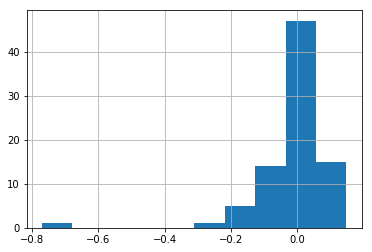

In [183]:
residuals = y_test-rf_grid_aware.best_estimator_.predict(X_test)
pd.Series(residuals).hist()

### Consideration

In [184]:
df_cons = df.drop(axis=1, columns=['aware', 'purch']).dropna()
X = df_cons.drop(axis=1, columns=['cons'])
y_cons = df_cons['cons']

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cons, test_size=0.2, random_state=42)

In [186]:
params = [{
    'n_estimators': [10, 25, 50, 250, 500],
    'max_depth': [1, 2, 6, 10],
    'max_features': ['auto'] 
}]

rf_cons = RandomForestRegressor(random_state=42)
rf_grid_cons = GridSearchCV(rf_cons, params)
rf_grid_cons.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 25, 50, 250, 500], 'max_depth': [1, 2, 6, 10], 'max_features': ['auto']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [187]:
rmse_cons = mean_squared_error(y_test, rf_grid_cons.best_estimator_.predict(X_test))**0.5

rmse_cons

0.05110234872177124

In [188]:
rf_cons = rf_grid_cons.best_estimator_

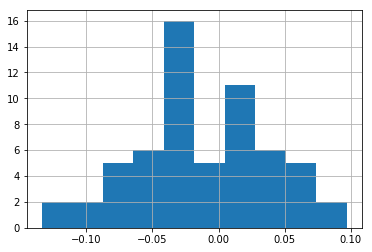

In [189]:
residuals = y_test-rf_grid_cons.best_estimator_.predict(X_test)
pd.Series(residuals).hist()

### Purchase

In [190]:
df_purch = df.drop(axis=1, columns=['aware', 'cons']).dropna()
X = df_purch.drop(axis=1, columns=['purch'])
y_purch = df_purch['purch']

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y_purch, test_size=0.2, random_state=42)

In [192]:
params = [{
    'n_estimators': [10, 25, 50, 250, 500],
    'max_depth': [1, 2, 6, 10],
    'max_features': ['auto'] 
}]

rf_purch = RandomForestRegressor(random_state=42)
rf_grid_purch = GridSearchCV(rf_purch, params)
rf_grid_purch.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 25, 50, 250, 500], 'max_depth': [1, 2, 6, 10], 'max_features': ['auto']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [193]:
rmse_purch = mean_squared_error(y_test, rf_grid_purch.best_estimator_.predict(X_test))**0.5

rmse_purch

0.07838654440639152

In [194]:
rf_purch = rf_grid_purch.best_estimator_

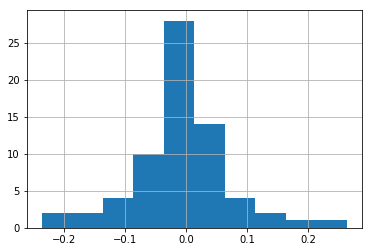

In [195]:
residuals = y_test-rf_grid_purch.best_estimator_.predict(X_test)
pd.Series(residuals).hist()

### Save Models

In [159]:
from sklearn.externals import joblib

joblib.dump(rf_aware, r'C:\Users\william.raikes\Programming\Python\Creative_Elements_App\model_building\pickled_models\rf_aware_creative.pkl') 
joblib.dump(rf_cons, r'C:\Users\william.raikes\Programming\Python\Creative_Elements_App\model_building\pickled_models\rf_cons_creative.pkl') 
joblib.dump(rf_purch, r'C:\Users\william.raikes\Programming\Python\Creative_Elements_App\model_building\pickled_models\rf_purch_creative.pkl') 

['C:\\Users\\william.raikes\\Programming\\Python\\Creative_Elements_App\\model_building\\pickled_models\\rf_purch_creative.pkl']

### Test Prediction 

See how well it does with real scenarios, not just metric scores.

In [202]:
rf_aware.predict(df.iloc[100, 3:]), rf_cons.predict(df.iloc[100, 3:]), rf_purch.predict(df.iloc[100, 3:])

c:\users\william.raikes\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\william.raikes\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\william.raikes\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.resh

(array([0.70293704]), array([0.26437393]), array([0.28854445]))